# Introduction to Quantum Computing and Qiskit

U. of Chicago, EPiQC, https://www.epiqc.cs.uchicago.edu/, 2022

<hr class="intro">

### Navigation Guide:

 - Scroll up and down to read this Jupyter notebook.
 - Click anywhere in the **Outline** to jump to that section.
 - Text Cells:
     - If you accidentally click `Enter` on a cell (which puts the cell in Edit mode), 
press `Shift+Enter` to run the cell (to get back to Command mode).
 - Code Cells:
     - To edit any Qiskit or Python code, click on the cell (to enter Edit mode).
     - Press `Shift+Enter` to run the code in the cell.
     - Cells will be numbered `[1]`, `[2]`, `[3]`, ... in the order they are run. 
 - To start this lesson all over, you can restart the notebook by clicking on `Kernel` in the Menu Bar and choose `Restart Kernel and Clear All Outputs...`

<hr class="intro">

# Lesson 2a: Quantum States in Qiskit

<hr class="intro">

### Outline

**[0. Teacher Introduction](#lesson4intro)**


**[1. Student Exercise 1: How Qiskit Represents Quantum States](#lesson4ex1)**

* [1.1 Questions](#lesson4q1)

**[2. Student Exercise 2: Quantum States and Operations](#lesson4ex2)**

* [2.1 Questions](#lesson4q2)

**[3. Student Exercise 3: Peeking Inside a Quantum Circuit](#lesson4ex3)**

* [3.1 Questions](#lesson4q3)

**[4. Student Exercise 4: Visualizing Quantum States with the Bloch Sphere](#lesson4ex4)**

* [4.1 Questions](#lesson4q4)

**[5.  Using Composer to explore a new gate](#lesson4ex5)**

**[6.  Constructing circuits with input / output pairs](#lesson4ex6)**

<hr class="intro">

## Introduction <a id="lesson4intro"></a>

In this lesson, we will learn how Qiskit stores quantum states.

### Decomposing the Classical Computer

Everything stored on a classical computer is in the form of a number. This includes every letter, color, image, and audio file on the computer you are using right now.

All of those numbers are stored in binary. A binary digit (also called a **bit**) is either a 0 or a 1. This means that all of the information stored on a computer is stored as sequences of 0's and 1's, something like: `00010101010001010.....`

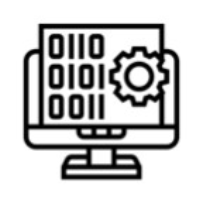

Programming languages (like Python) typically hide these details, so programmers usually don't need to worry about bits. If you want to use the color "red", your programming language will be able to use the word `red` instead of the string of bits (like `11111111 00000000 00000000`) that represents "red". This makes it much easier to program a computer.

### Decomposing the Quantum Computer

**Quantum computers** have programming languages, but they have not been developed as far as the programming languages we have for classical computers. Programming for quantum computers involves more of the underlying details and the math. Therefore, to program a quantum computer, it is helpful to learn how quantum computers store information in the form of quantum bits. 

### Running a Cell  

Remember that you can run the cell by clicking on it then pressing `Shift + Enter`.

## Student Exercise 1: How Qiskit Represents Quantum States <a id="lesson4ex1"></a>

There are two main ways to write quantum states. 

1. **Vector notation**
2. **Bra-ket notation**

### Step 1: Create a quantum state in Qiskit from a label

How exactly does Qiskit store a quantum state? Qiskit uses a type of object called a `Statevector`. 

<p class="note">    
    <b>Statevector</b>: The <code>Statevector</code> class represents a quantum state vector in Qiskit. It has methods for creating a <code>Statevector</code> and manipulating the quantum state. It also has methods that provide information about measurements on the quantum state.
<br>
<br>
(Qiskit documentation: <a href="https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html">Statevector</a>)
</p>
<p class="note">    
    <b>Statevector.from_label()</b> - Return a <code>Statevector</code> from one of the available labels.
</p>

The `from_label()` method is one way to create a `Statevector`. 

| Label | Statevector          |
| ----- | ---------------------|
| "0"   | [1, 0] (The 0 state) |
| "1"   | [0, 1] (The 1 state) |

Run the next cell to make the **zero state** from the label "0".

In [ ]:
# Import
from qiskit.quantum_info import Statevector

# Create the zero state
state0 = Statevector.from_label("0")

`state0` now represents the zero state in Qiskit. 

It would be great if we could display this state to see what it looks like. 

Next, we will show you how to display a `Statevector` in vector notation.

### Step 2: Vector notation

One way to write a quantum state is called **vector notation**.

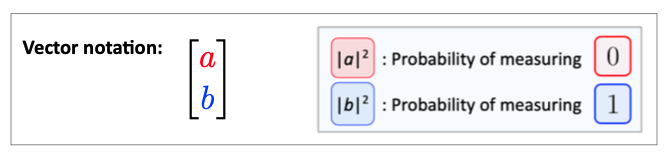

<p class="note">    
    <b>array_to_latex()</b>: The <code>array_to_latex()</code> function in Qiskit allows us to visualize a vector.
<br>
<br>
(Qiskit documentation: <a href="https://qiskit.org/documentation/stubs/qiskit.visualization.array_to_latex.html">array_to_latex</a>)
</p>

Run the next cell to see what this state looks like in vector notation. 

In [ ]:
# Import
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex

# Create the zero state
state0 = Statevector.from_label("0")
# Display the state in vector notation
array_to_latex(state0, prefix="\\text{state0} =")

Hopefully you saw the zero state represented as the vector $[1, 0]$. (Qiskit displays the vector as a row vector.)


### Step 3: Create a quantum state in Qiskit from a vector

The `from_label()` method is a convenient way to create a `Statevector` in Qiskit, but it is limited to states that can be described by one of the available labels. (See the [*Qiskit documentation*](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.from_label.html#qiskit.quantum_info.Statevector.from_label) for a list of the six possible labels.)

<p class="note">    
    <b>Statevector([a b])</b> - Using <code>Statevector()</code> directly on a vector <code>[a b]</code> creates the quantum state vector $[a, b]$ in Qiskit.
</p>

You can also directly give Qiskit a list of numbers that describes the vector. 

Let's create the quantum state
$$\begin{bmatrix} \frac{1}{2} \\ \frac{\sqrt{3}}{2} \end{bmatrix}.$$

Note: You can't make this state with the `from_label()` method!

In [ ]:
# Import
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from math import sqrt

# Create a Statevector
state = Statevector([1/2, sqrt(3)/2])

# Display the state
#  This example uses the optional prefix parameter
#
array_to_latex(state, prefix="\\text{state} =")

### Questions

<div class="questions">

<p class="question"> 
    Explore: Try running this cell above again with different vectors in place of <code>[1/2, sqrt(3)/2]</code> </p>

Suggestions: 
- Try it with negative numbers.
- Try it with decimals.
- Try it with complex numbers. (Use `1.j` for the imaginary number $i$.) 
- A quantum state vector needs to satisfy the condition $|a|^2 + |b|^2 = 1$, but you can even it try it with numbers that don't satisfy the condition.
</div>

### Step 2: Bra-ket notation

Another way to write down a quantum state is by using **bra-ket notation**.

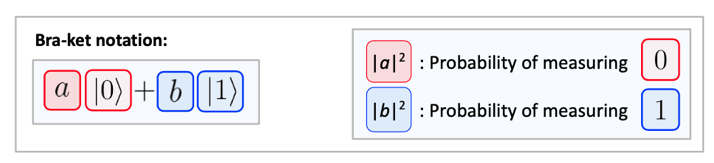

Quantum scientists often use bra-ket notation to write quantum states. 

<p class="note">    
    <b>Statevector.draw()</b> - Use <code>draw()</code> to visualize a Statevector. 
</p>

Qiskit is able to display a quantum state in bra-ket notation using the `draw()` method's `'latex'` option.

Run the next cell to see `state0` displayed in bra-ket notation:

In [4]:
# Import
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex

# Create the zero state
state0 = Statevector.from_label("0")
# Display the state in vector notation
# array_to_latex(state0, prefix="\\text{state0} =")
# Display the state in bra-ket notation
state0.draw('latex')

# Note: This will only display the last thing to print out!!

<IPython.core.display.Latex object>

### Questions: <a id="lesson4q1"></a>

<div class="questions">

<p class="question">
1. Create the "one state" $|1\rangle$ in Qiskit using any of the methods described above.
</p>

<p class="question">
2. Display the state in vector notation.
</p>    

<p class="question">
3. Display the state in bra-ket notation.
</p>     
    
Complete the Qiskit code in the code cells below. We separate it into two because each cell only shows the last thing printed out.
</div>

In [ ]:
# Create the one state
state1 = 

# Display the one state in vector notation


In [ ]:
# Create the one state
state1 = 

# Display the one state in bra-ket notation


## Student Exercise 2: Quantum States and Operations <a id="lesson4ex2"></a>

In this exercise, we will use Qiskit to see how a quantum state is changed by a quantum operation.

### Step 1: H Gate

We are going to use Qiskit to simulate the following **H gate** operation on the 1 state:

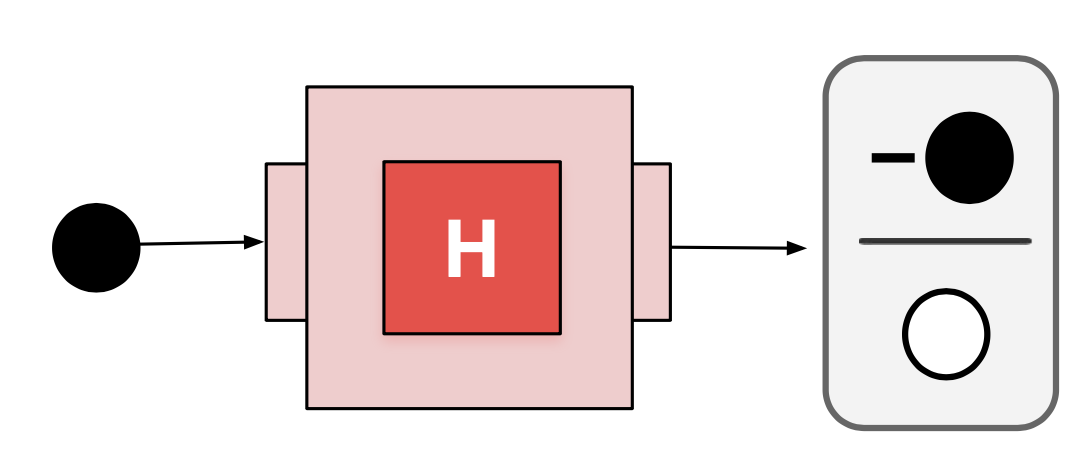

### Question:

<div class="questions">
    
<p class="question"> Start by making a 1-qubit circuit that contains a single H gate. </p>

Complete the Qiskit code in the following cell.

Then, run the cell.

</div>

In [ ]:
from qiskit import QuantumCircuit

# Create a circuit with an H gate
circuitH = 


# Visualize the circuit.


### Step 2: Apply the H gate

<p class="note">    
    <b>Statevector.evolve()</b> - Apply a quantum operation to a <code>Statevector</code> and return the resulting <code>Statevector</code>.
</p>

We use the `evolve()` method to see how a quantum state evolves when it goes through a quantum circuit made out of quantum operations.

We'll use the `Statevector`'s `evolve()` method to see how the 1 state is changed by the **H gate** operation.

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from math import sqrt

# Create a circuit with an H gate
circuitH = # fill in code you wrote above

# Create the one state
state = Statevector.from_label()

# Apply the H gate to the one state
state2 = 

# see the result in bra-ket notation

In [ ]:
# See the result in bra-ket notation
state2.draw('latex')

In [ ]:
# See the result in vector notation
array_to_latex(state2, prefix="\\text{state2} =")

Did you see the result that you expected?

### Questions: <a id="lesson4q1"></a>

Let's see what happens when you apply the H gate twice in a row.

<div class="questions">

<code>state2</code> is the result of applying the H gate once to the 1 state.

<p class="question">
Apply the H gate again.
</p>

Complete the Qiskit code in the cell below.
</div>

In [ ]:
# Apply the H gate to state2
[ENTER YOUR CODE HERE]

# Display the result in bra-ket notation
[ENTER YOUR CODE HERE]

## Student Exercise 3: Peeking Inside a Quantum Circuit  <a id="lesson4ex3"></a>

What if you have a circuit made out of several quantum operations?

We might want to know what the quantum state is at several points within the circuit.

Qiskit allows us to see the quantum states at certain points through a quantum circuit.

### Step 1: Create a circuit

First, create the following quantum circuit with 3 gates. 

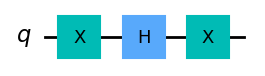

It applies the **NOT gate**, then the **H gate**, then the **NOT gate** again.

### Question:

<div class="questions">

<p class="question"> Complete the Qiskit code in the following cell to create this circuit.</p>

</div>

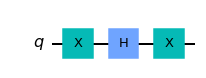

In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from math import sqrt

# Create circuit
circuitXHX = QuantumCircuit(1)

# Add quantum gates
circuitXHX.x(0)
circuitXHX.h(0)
circuitXHX.x(0)

# Display the circuit
circuitXHX.draw('mpl')

### Step 2: Quantum states in the circuit

Let's apply these operations to the superposition state
$$\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle.$$

### Question: 

<div class="questions">

Suppose $\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$ is the initial state in the following circuit:

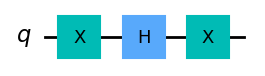
    
<p class="question"> Before you run the following cells, first figure out how this state evolves through the circuit. </p>

a. What do you think the state is after the first NOT gate?

b. What do you think the state is after the H gate?

c. What do you think the state is after the second NOT gate?

</div>

**DOUBLE-CLICK ON THIS CELL and WRITE YOUR ANSWER HERE FIRST:**

Your Answer:

a.
    
b.
    
c.



<details>
<summary>Click here for hints/check your answers</summary>

a. The NOT gate doesn't change the state. It's still  $\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$.

b. The H gate changes the state to the 0 state.

c. The second NOT gate changes the 0 state to the 1 state.
</details>

### Step 3: Add Statevectors

Use Qiskit to see what the state is at each step through the circuit.

We will modify the Qiskit code that we ran in the previous cell. 

At each step of the circuit, we will assign a `Statevector` object to a variable, so we can look at it after we run the cell.

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from math import sqrt

# Initial state to 1/rt(2), 1/rt(2)
state0 = 

# Create circuit
circuit = QuantumCircuit(1)

# NOT gate
circuit.x(0)
state1 = state0.evolve(circuit)  # State right after the NOT gate - assign to state1

# H gate
circuit.h(0)
state2 = state0.evolve(circuit)  # State right after the H gate - assign to state2

# NOT gate (as before)


# Display the circuit
circuit.draw('mpl')

In [ ]:
# Display the Statevector (in bra-ket notation) right after the first NOT gate:
state1.draw('latex')

### Questions: <a id="lesson4q1"></a>

<div class="questions">

<p class="question">
1. Display the Statevector right after the H gate.    
</p>
<p class="question">
2. Display the Statevector right after the second X gate.    
</p>
    
Fill in the Qiskit code in the code cells below.
    
Run the cells.
    
Doesn't it match what you expected?
</div>

In [ ]:
# Display the Statevector right after the H gate:
[ENTER YOUR CODE HERE]

In [ ]:
# Display the Statevector right after the second X gate:
[ENTER YOUR CODE HERE]

## Student Exercise 4:  Visualizing Quantum States with the Bloch Sphere <a id="lesson4ex4"></a>

One nice way to visualize a qubit is by looking at a 3-dimensional representation of a qubit called the **Bloch Sphere**.

We won't be using the Bloch Sphere in the rest of this Qiskit module, but it is fun to try out some of the following visualization functions in Qiskit. 

A qubit state in the Bloch Sphere representation is a vector from the origin to a point on the surface of a 3-dimensional sphere. 

**Quantum operations** can change where the vector points on the surface of this sphere.

### Step 1: Zero state

The `draw()` method for `Statevector` objects has an option called `'bloch'` that will produce a visualization of the Bloch Sphere representation of a quantum state.

Try running the next cell to see what the Bloch Sphere vector looks like for the zero state $|0\rangle$. 

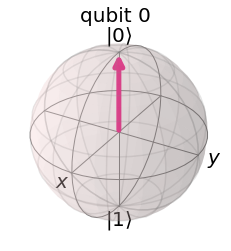

In [15]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from math import sqrt

state0 = Statevector.from_label("0")

state0.draw('bloch')

### Step 2: Explore
Imagine the Bloch Sphere as a globe. 

Now try out a bunch of different states and see where they point. Do you see a trend? Use this section below to play around with the different questions in Gradescope.

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from math import sqrt

state_explore = Statevector([1/2, sqrt(3)/2])
 # [ENTER YOUR CODE HERE]

state_explore.draw('bloch')

## Student Exercise 5:  Using Composer to explore a new gate <a id="lesson4ex5"></a>

If you don't know a gate, one way to explore its behavior is through experimentation with IBM Composer.
Let's look at the output from the qubit circuit in Composer - a circle with a radius that has color. 
Let's see what this looks like with four of our states that we understand. Using the gates, make q\[0\] be the original value, q\[1\] be a not gate, q\[2\] be an H gate, and q\[3\] be a not gate followed by an H gate.

<img src="attachment:ComposerAllValues.png" alt="center" width="275">

Now answer the subquestions of question 5 in Gradescope about what the radius and color of the circles mean.


Now you are in position to use Composer to try out a new gate!!! Let's try the S gate. On q\[4\], place an S gate and compare to q\[0\]. Then add an not gate before the S gate and compare to q\[1\]. Then add an H gate and compare to q\[3]. Finally, remove the not gate and compare to \[2\]. 


## Student Exercise 6:  Constructing circuits with input / output pairs <a id="lesson4ex6"></a>

Now that you have gained intuition on how the gates work (and can gain more by playing with them through IBM Composer), you're ready to create some simple circuits from input output pairs. The key to solving these is to think about the individual differences between the starting point and the ending point, and how to get there. Remember that Composer always starts at |0>, so if you want to try out your answer if the starting point is something other than |0>, you'll need to initialize with some gates first.

You can find the exact questions within Gradescope. You may use IBM Composer, IBM Quantum Lab, or paper / pencil in order to play around with solving them.

You must submit your answer by putting the gates into IBM Composer (remember to initialize properly if it doesn't start at |0>) and taking a screenshot of just the circuit, including the circles on the right. Single-qubit problems must always be shown as q\[0\]. For multi-qubit questions, position them such that the circuit looks the same on the screen and in composer, knowing that Qiskit interprets it backwards in the histogram.
